Importing Libraries


In [50]:
import numpy as n
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, auc,RocCurveDisplay

In [51]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Read the dataset

In [52]:
d=pd.read_csv("/content/gdrive/My Drive/Data_Mining/train_data.csv")
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [53]:
d.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


Finding correlations between features with target attribute

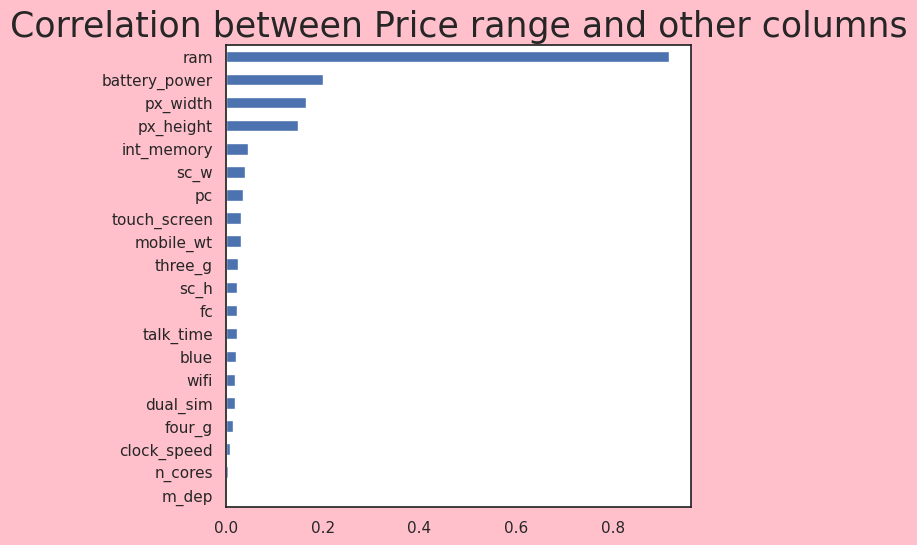

In [54]:
correlation=d.corr()
plt.figure(figsize=(6,6),facecolor="pink")
abs(correlation['price_range']).sort_values(ascending=True)[:-1].plot.barh()
plt.title('Correlation between Price range and other columns',fontsize=25)
plt.show()

DATA PREPROCESSING

In [55]:
d = d.drop(['clock_speed','n_cores','m_dep'], axis = 1)

In [56]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   battery_power  2000 non-null   int64
 1   blue           2000 non-null   int64
 2   dual_sim       2000 non-null   int64
 3   fc             2000 non-null   int64
 4   four_g         2000 non-null   int64
 5   int_memory     2000 non-null   int64
 6   mobile_wt      2000 non-null   int64
 7   pc             2000 non-null   int64
 8   px_height      2000 non-null   int64
 9   px_width       2000 non-null   int64
 10  ram            2000 non-null   int64
 11  sc_h           2000 non-null   int64
 12  sc_w           2000 non-null   int64
 13  talk_time      2000 non-null   int64
 14  three_g        2000 non-null   int64
 15  touch_screen   2000 non-null   int64
 16  wifi           2000 non-null   int64
 17  price_range    2000 non-null   int64
dtypes: int64(18)
memory usage: 281.4 KB


In [57]:
df = pd.DataFrame(d, columns=['battery_power', 'blue', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'])

<Axes: >

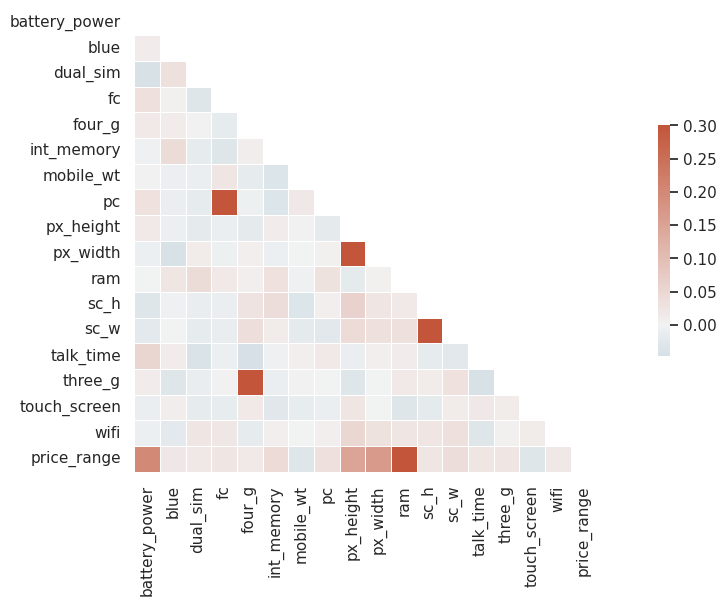

In [58]:
import seaborn as sns
sns.set(style="white")
corr = df.corr()
mask = n.triu(n.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 6))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})


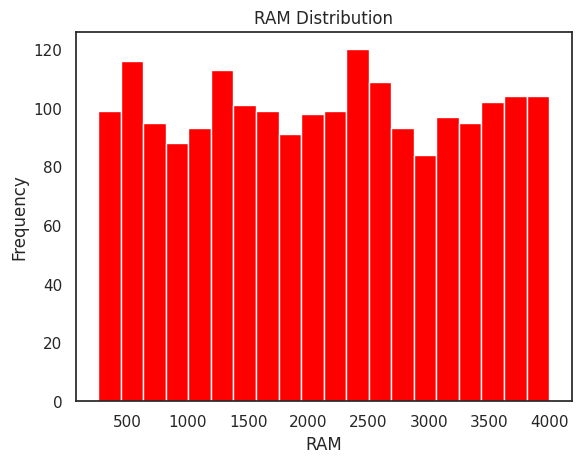

In [59]:
plt.hist(df['ram'], bins=20,color='red')
plt.xlabel('RAM')
plt.ylabel('Frequency')
plt.title('RAM Distribution')
plt.show()

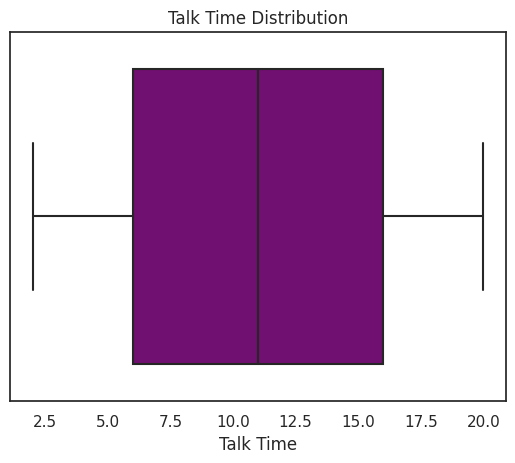

In [60]:
sns.boxplot(x=df['talk_time'],color='purple')
plt.xlabel('Talk Time')
plt.title('Talk Time Distribution')
plt.show()

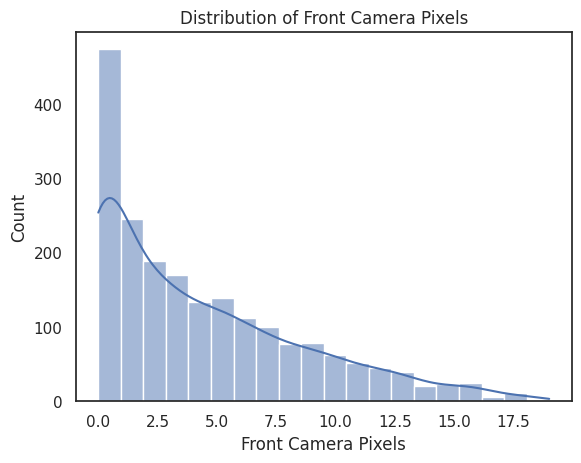

In [61]:
sns.histplot(df, x='fc', kde=True)
plt.xlabel('Front Camera Pixels')
plt.title('Distribution of Front Camera Pixels')
plt.show()

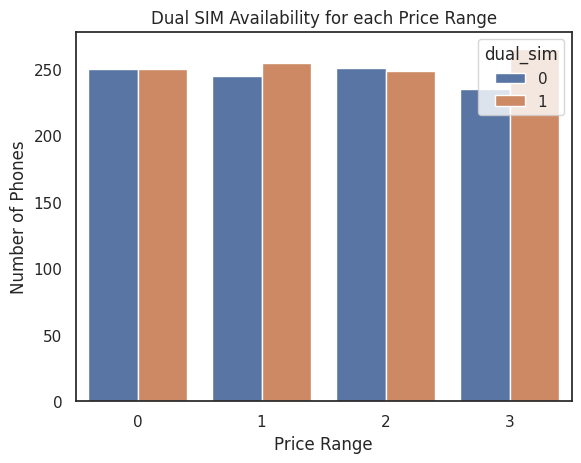

In [62]:
sns.countplot(x=df['price_range'], hue=df['dual_sim'])
plt.xlabel('Price Range')
plt.ylabel('Number of Phones')
plt.title('Dual SIM Availability for each Price Range')
plt.show()


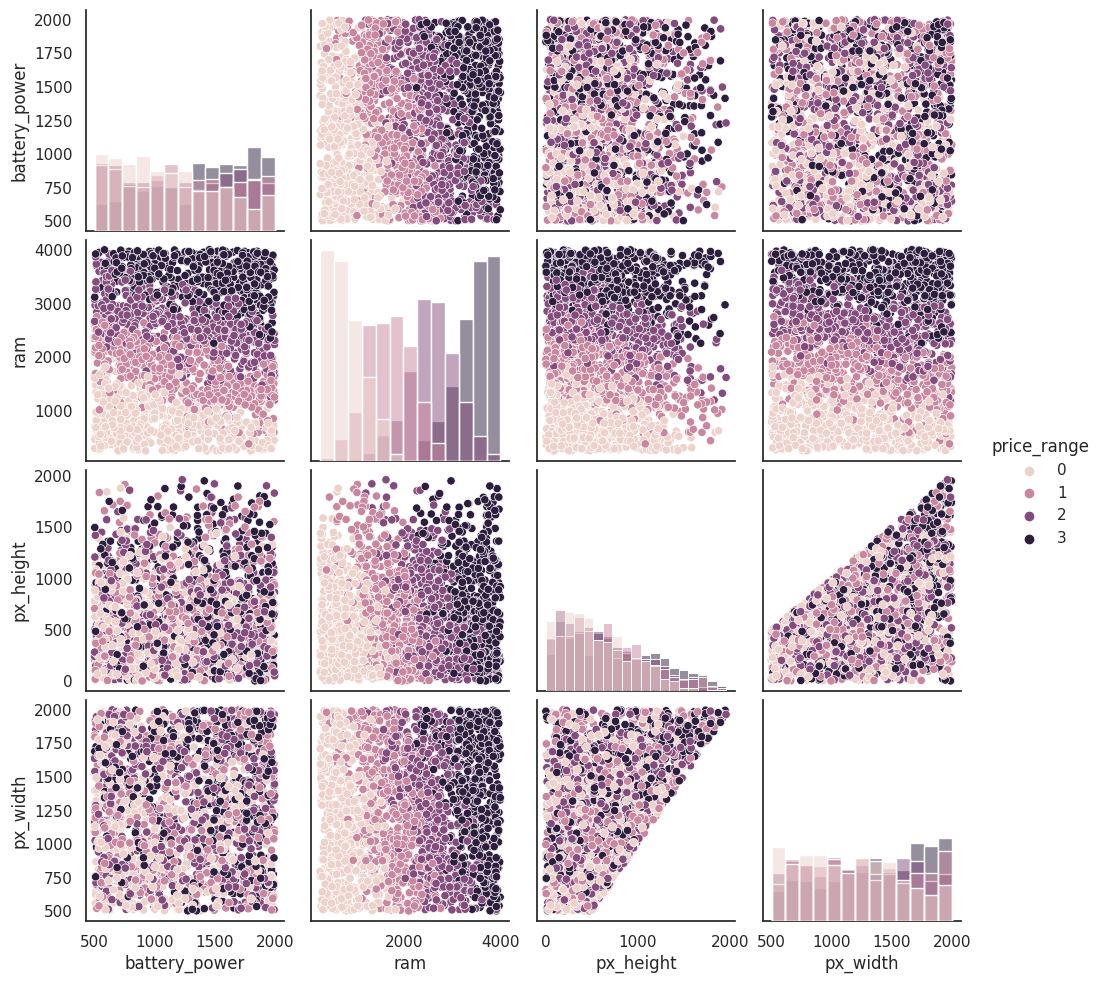

In [63]:
sns.pairplot(df[['battery_power', 'ram', 'px_height', 'px_width', 'price_range']], hue="price_range", diag_kind="hist")
plt.show()

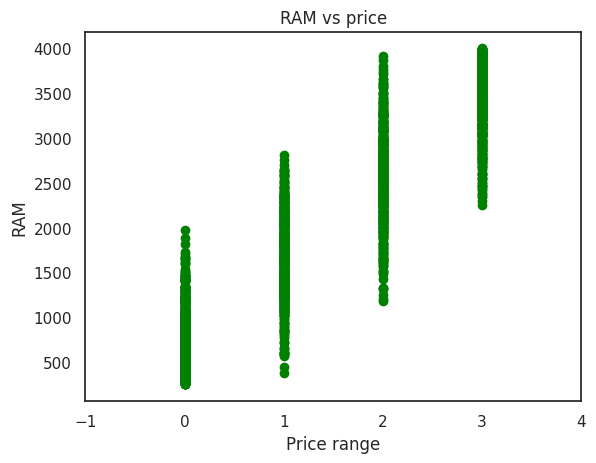

In [64]:
plt.scatter(df['price_range'],df['ram'],color='green')
plt.xlabel('Price range')
plt.ylabel('RAM')
plt.xlim(-1,4)
plt.title('RAM vs price')
plt.show()

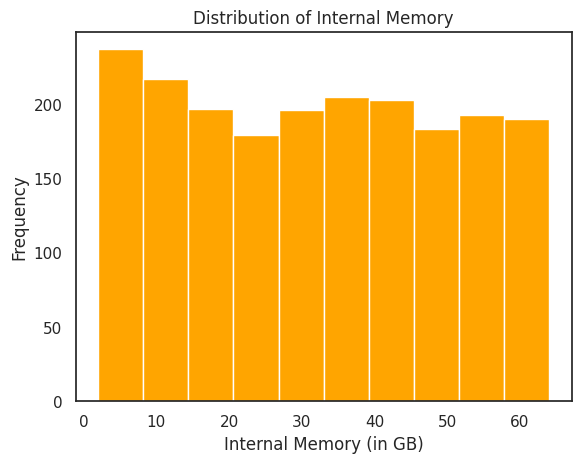

In [65]:
plt.hist(df['int_memory'], bins=10, color='orange')
plt.xlabel('Internal Memory (in GB)')
plt.ylabel('Frequency')
plt.title('Distribution of Internal Memory')
plt.show()

<Axes: xlabel='touch_screen', ylabel='count'>

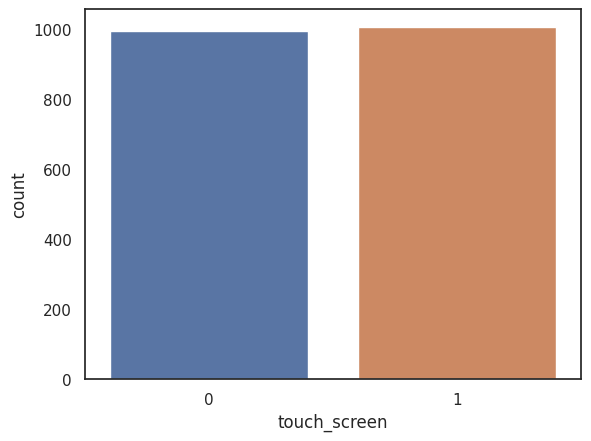

In [66]:
sns.countplot(x=d["touch_screen"],data=d)

In [67]:
print("3G\n",d['three_g'].value_counts(),'\n')
print("4G\n",d['four_g'].value_counts(),'\n')

3G
 1    1523
0     477
Name: three_g, dtype: int64 

4G
 1    1043
0     957
Name: four_g, dtype: int64 



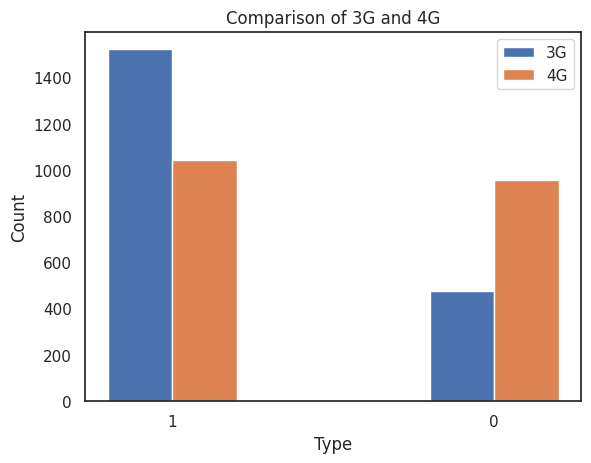

In [68]:
three_g = [1523, 477]
four_g = [1043, 957]
labels = ['1', '0']
fig, ax = plt.subplots()
width=0.2
ax.bar(n.arange(len(labels)) - width/2, three_g, width, label='3G')
ax.bar(n.arange(len(labels)) + width/2, four_g, width, label='4G')
ax.set_xticks(n.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_xlabel('Type')
ax.set_ylabel('Count')
ax.set_title('Comparison of 3G and 4G')
ax.legend()
plt.show()

Text(0.5, 1.0, 'Number of devices according to RAM size')

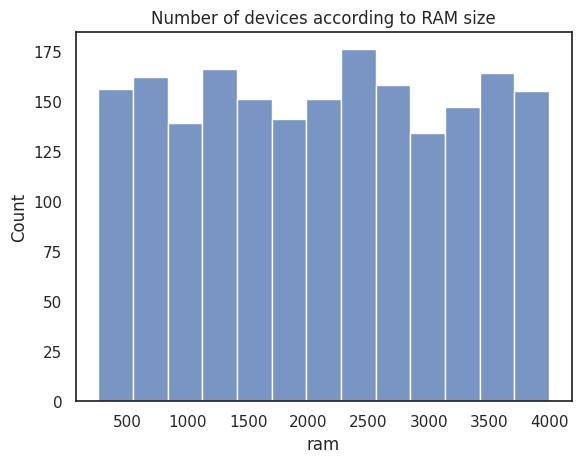

In [69]:
sns.histplot(x=d["ram"],data=d)
plt.title("Number of devices according to RAM size")

In [70]:

x_variable=d.drop("price_range",axis=1)
y_variable=d["price_range"]

Splitting the dataset into train and test sets

In [71]:
x_train,x_test,y_train,y_test=train_test_split(x_variable,y_variable,test_size=0.2,random_state=42)

In [72]:
print('x_train values : ', x_train.shape)
print('x_test values : ', x_test.shape)
print('y_train values : ', y_train.shape)
print('y_test values : ', y_test.shape)


x_train values :  (1600, 17)
x_test values :  (400, 17)
y_train values :  (1600,)
y_test values :  (400,)


Logistic Regression

In [73]:
lr=LogisticRegression(max_iter=50000, solver='saga')
lr.fit(x_train,y_train)


LogisticRegression(max_iter=50000, solver='saga')

In [74]:
predicted_value=lr.predict(x_test)
print(predicted_value)

[0 2 0 2 1 2 2 0 3 2 0 1 2 3 3 1 2 3 1 0 0 1 0 2 0 1 3 3 2 0 1 0 3 0 2 2 2
 1 3 0 1 2 3 0 3 3 2 1 3 1 3 1 0 0 1 1 1 2 0 0 1 2 2 1 1 0 3 3 1 1 2 1 0 1
 2 0 0 3 1 2 3 2 1 0 1 3 2 3 3 0 3 3 3 1 3 1 3 3 2 1 0 0 1 0 0 3 3 0 1 1 0
 0 3 2 2 1 3 3 0 2 1 3 2 1 3 3 0 3 0 2 3 0 1 2 0 2 1 1 0 2 3 1 3 3 0 0 0 2
 1 2 3 1 1 0 2 3 0 1 0 1 3 3 2 2 1 0 0 2 2 3 2 1 0 0 3 1 1 2 1 1 0 0 0 1 3
 2 0 2 0 0 0 0 1 3 3 1 0 1 1 1 2 2 1 2 3 3 1 3 0 0 1 1 1 2 3 1 1 2 1 1 3 1
 3 0 0 2 0 2 0 0 2 0 2 3 2 1 0 2 3 1 3 3 2 3 0 3 2 2 3 3 2 1 1 3 2 1 3 3 3
 3 3 0 2 2 3 2 2 0 2 3 2 2 2 0 1 2 0 2 3 1 3 2 1 3 1 2 0 0 3 0 1 2 3 3 3 0
 1 0 1 3 3 0 1 1 2 0 3 3 3 3 1 3 2 0 3 2 3 2 0 0 1 3 2 3 1 1 2 0 3 3 2 0 2
 2 2 1 3 1 0 3 1 2 2 0 1 1 1 1 2 3 2 0 1 2 2 0 3 0 0 2 0 1 1 2 2 3 0 2 1 3
 3 3 3 3 1 2 0 3 1 3 3 0 1 3 1 3 3 3 1 0 3 2 0 0 3 3 2 2 3 2]


In [75]:
lr_accuracy = metrics.accuracy_score(y_test,predicted_value)*100
print("Accuracy score:",lr_accuracy,"%")

Accuracy score: 70.0 %


Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.80      0.84       105
           1       0.60      0.65      0.62        91
           2       0.53      0.55      0.54        92
           3       0.77      0.77      0.77       112

    accuracy                           0.70       400
   macro avg       0.70      0.69      0.69       400
weighted avg       0.71      0.70      0.70       400

--------------------------------------------------------


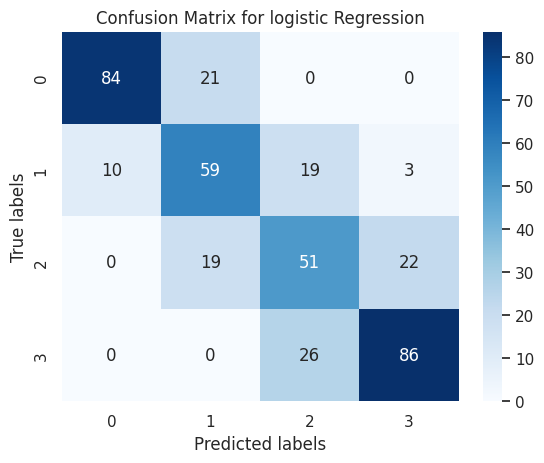

In [76]:
print("Classification Report for Logistic Regression")
print(classification_report(y_test, predicted_value))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test, predicted_value)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for logistic Regression')
plt.show()

KNN Classifier

In [77]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [78]:
knn_predicted_value=knn.predict(x_test)
print(knn_predicted_value)

[0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 2 2 2 1 3 1 3 1 0 0 0 0 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 2 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 1 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 3 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 2 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 2 1 0 1 1 1 1 1 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 3 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 0 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 3 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 1 3 2 0 2 1 1 1 0 0 1 3 2 3 1 0 1 0 1 2 3 0 2
 3 2 1 3 0 0 3 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 2 0 3 1 3 3 0 2 3 2 3 3 3 1 0 2 3 0 0 2 3 2 1 1 2]


In [79]:
knn_accuracy = metrics.accuracy_score(y_test,knn_predicted_value)*100
print("Accuracy score:",knn_accuracy,"%")

Accuracy score: 92.75 %


Classification Report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       105
           1       0.89      0.93      0.91        91
           2       0.88      0.88      0.88        92
           3       0.96      0.93      0.95       112

    accuracy                           0.93       400
   macro avg       0.92      0.93      0.93       400
weighted avg       0.93      0.93      0.93       400

--------------------------------------------------------


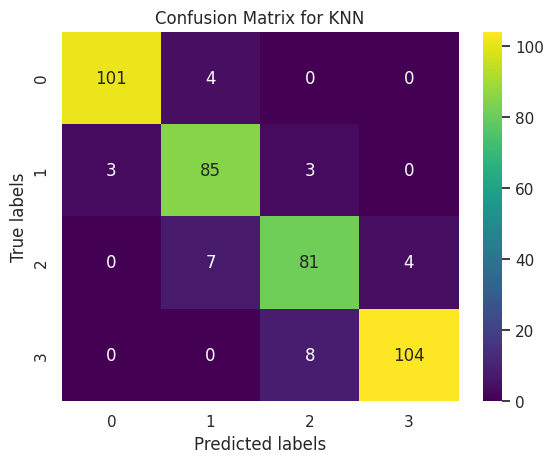

In [80]:
print("Classification Report for K-Nearest Neighbor")
print(classification_report(y_test, knn_predicted_value))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test, knn_predicted_value)
sns.heatmap(conf_matrix, annot=True, cmap='viridis', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN')
plt.show()


Random Forest

In [81]:
rf = RandomForestClassifier(max_depth=2, random_state=0)
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [82]:
rf_predict_value=rf.predict(x_test)
print(rf_predict_value)


[0 2 1 2 1 2 2 0 3 1 0 0 2 3 3 3 3 3 1 0 0 1 1 1 0 1 3 2 3 0 0 0 3 0 1 0 2
 0 3 1 2 3 2 0 2 3 2 0 3 1 3 1 0 0 0 1 1 3 0 0 0 3 2 2 0 0 3 3 1 2 2 3 0 1
 2 0 0 3 2 2 2 2 1 0 1 3 2 3 3 0 3 3 2 0 3 2 1 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 0 3 3 1 3 3 0 2 0 2 2 0 3 3 0 3 1 0 0 2 2 0 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 2 3 3 1 0 0 2 1 2 3 0 0 0 3 1 1 2 0 0 0 0 0 0 2
 2 0 2 0 0 0 0 1 3 3 1 0 1 2 1 1 2 1 3 2 3 1 3 0 0 0 1 1 1 3 1 0 2 2 1 3 1
 3 0 0 2 0 3 0 1 1 0 1 3 2 0 1 3 3 0 2 3 2 3 0 3 1 3 3 3 2 1 0 3 3 1 3 2 3
 3 3 0 1 2 3 2 3 0 2 3 2 3 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 0 0 1 3 3 0 1 1 2 0 3 2 2 3 1 3 2 0 2 1 2 0 0 0 1 3 3 3 1 0 1 0 2 2 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 0 2 3 1 0 0 3 3 0 3 0 0 1 0 0 2 2 2 3 0 3 3 3
 3 3 3 2 1 2 0 3 2 2 3 0 1 3 1 3 3 3 0 0 2 3 0 0 3 3 1 1 0 2]


In [83]:
rf_accuracy = metrics.accuracy_score(y_test,rf_predict_value)*100
print("Accuracy score:",rf_accuracy,"%")


Accuracy score: 81.0 %


Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       105
           1       0.77      0.68      0.72        91
           2       0.70      0.67      0.69        92
           3       0.88      0.88      0.88       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400

--------------------------------------------------------


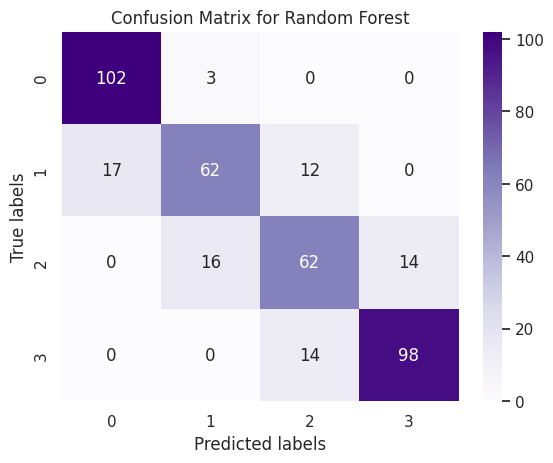

In [84]:
print("Classification Report for Random Forest")
print(classification_report(y_test, rf_predict_value))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test, rf_predict_value)
sns.heatmap(conf_matrix, annot=True, cmap='Purples', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()


Decision Tree

In [85]:
dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [86]:
dt_predict_value=rf.predict(x_test)
print(dt_predict_value)

[0 2 1 2 1 2 2 0 3 1 0 0 2 3 3 3 3 3 1 0 0 1 1 1 0 1 3 2 3 0 0 0 3 0 1 0 2
 0 3 1 2 3 2 0 2 3 2 0 3 1 3 1 0 0 0 1 1 3 0 0 0 3 2 2 0 0 3 3 1 2 2 3 0 1
 2 0 0 3 2 2 2 2 1 0 1 3 2 3 3 0 3 3 2 0 3 2 1 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 3 2 3 2 0 2 0 3 3 1 3 3 0 2 0 2 2 0 3 3 0 3 1 0 0 2 2 0 3 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 2 3 3 1 0 0 2 1 2 3 0 0 0 3 1 1 2 0 0 0 0 0 0 2
 2 0 2 0 0 0 0 1 3 3 1 0 1 2 1 1 2 1 3 2 3 1 3 0 0 0 1 1 1 3 1 0 2 2 1 3 1
 3 0 0 2 0 3 0 1 1 0 1 3 2 0 1 3 3 0 2 3 2 3 0 3 1 3 3 3 2 1 0 3 3 1 3 2 3
 3 3 0 1 2 3 2 3 0 2 3 2 3 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 2 0 1 2 3 3 3 1
 0 0 1 3 3 0 1 1 2 0 3 2 2 3 1 3 2 0 2 1 2 0 0 0 1 3 3 3 1 0 1 0 2 2 2 0 3
 3 2 1 3 0 0 3 1 3 2 0 1 1 2 0 2 3 1 0 0 3 3 0 3 0 0 1 0 0 2 2 2 3 0 3 3 3
 3 3 3 2 1 2 0 3 2 2 3 0 1 3 1 3 3 3 0 0 2 3 0 0 3 3 1 1 0 2]


In [87]:
dt_accuracy = metrics.accuracy_score(y_test,dt_predict_value)*100
print("Accuracy score:",dt_accuracy,"%")

Accuracy score: 81.0 %


Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       105
           1       0.77      0.68      0.72        91
           2       0.70      0.67      0.69        92
           3       0.88      0.88      0.88       112

    accuracy                           0.81       400
   macro avg       0.80      0.80      0.80       400
weighted avg       0.81      0.81      0.81       400

--------------------------------------------------------


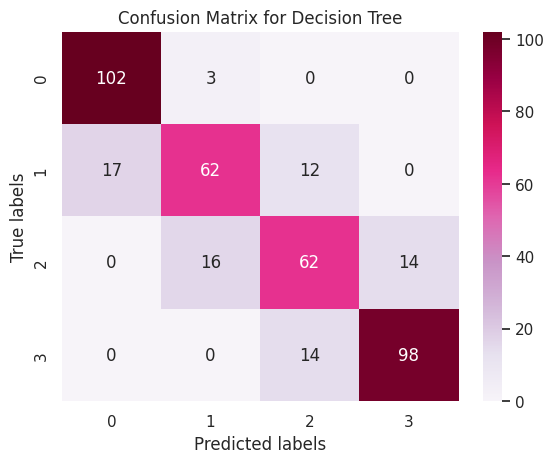

In [88]:
print("Classification Report for Decision Tree")
print(classification_report(y_test, dt_predict_value))
print("--------------------------------------------------------")
conf_matrix = confusion_matrix(y_test, dt_predict_value)
sns.heatmap(conf_matrix, annot=True, cmap='PuRd', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


Models with their Accuracy scores

In [89]:
models = pd.DataFrame({
    
    'Model': ['Logistic Regression','K-Nearest Neighbor','Random Forest','Decision Tree'],
    'Scores':[lr_accuracy,knn_accuracy,rf_accuracy,dt_accuracy]                  
                      })
models.sort_values(by='Scores', ascending=False)

,Model,Scores
1,K-Nearest Neighbor,92.75
2,Random Forest,81.00
3,Decision Tree,81.00
0,Logistic Regression,70.00


<Axes: title={'center': 'Model Performance using accuracy score\n1- KNN\n2-Random Forest\n3-Decision Tree\n0-Logistic Regression'}>

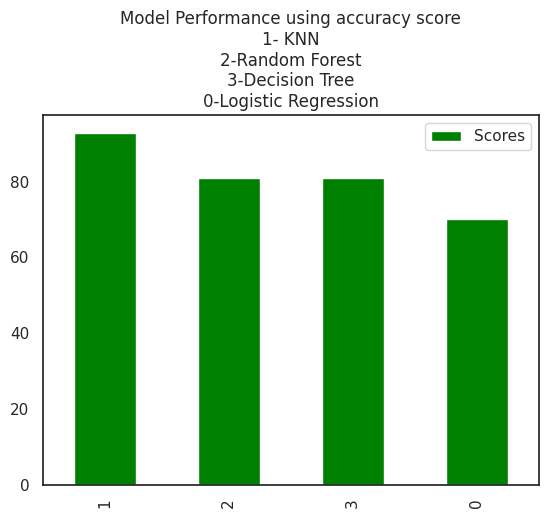

In [90]:
models.sort_values(by='Scores',ascending=False).plot(kind='bar', color=['green'],title="Model Performance using accuracy score\n1- KNN\n2-Random Forest\n3-Decision Tree\n0-Logistic Regression")

Compared to all four models KNN is having highest accuracy